<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded= files.upload()

Saving K-Means_Clustering.csv to K-Means_Clustering.csv


In [2]:
df= pd.read_csv('K-Means_Clustering.csv')

In [3]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


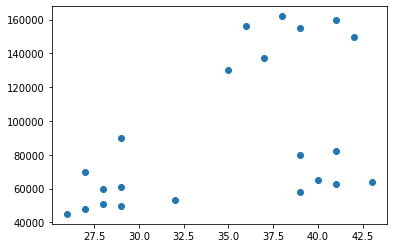

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Income'])

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [6]:
km= KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_predicted= km.fit_predict(df[['Age', 'Income']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [8]:
df['Clustered']= y_predicted
df.head()

,Name,Age,Income,Clustered
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0.5, 1.0, 'Income vs Age')

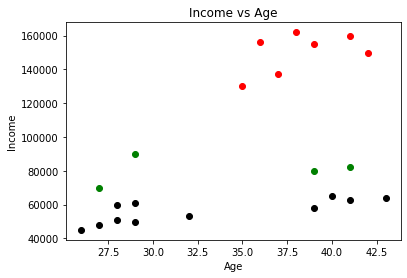

In [9]:
df1= df[df['Clustered']==0]
df2= df[df['Clustered']==1]
df3= df[df['Clustered']==2]
plt.scatter(df1['Age'], df1['Income'], color='green')
plt.scatter(df2['Age'], df2['Income'], color='red')
plt.scatter(df3['Age'], df3['Income'], color= 'black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age')

Our scaling is not right, that's why two data points are not clustered properly.

In [12]:
scaler= MinMaxScaler()
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])
df.head()

,Name,Age,Income,Clustered
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [14]:
scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])

df.head()

,Name,Age,Income,Clustered
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [15]:
km= KMeans(n_clusters=3)

y_pred= km.fit_predict(df[['Age', 'Income']])

y_pred


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [16]:
df['Clustered']= y_pred

Text(0.5, 1.0, 'Income vs Age')

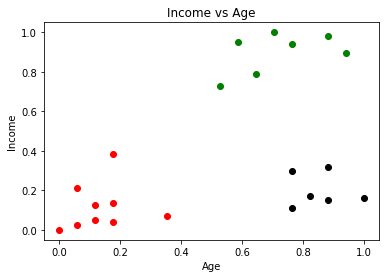

In [17]:
df1= df[df['Clustered']==0]
df2= df[df['Clustered']==1]
df3= df[df['Clustered']==2]
plt.scatter(df1['Age'], df1['Income'], color='green')
plt.scatter(df2['Age'], df2['Income'], color='red')
plt.scatter(df3['Age'], df3['Income'], color= 'black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age')

In [18]:
## To get the centroids
## We have three centroids here with x, and y corrdinates
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0.5, 1.0, 'Income vs Age')

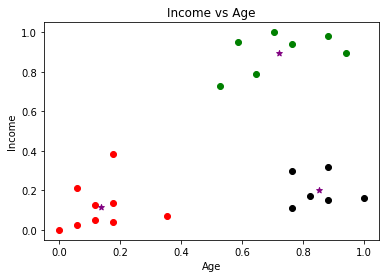

In [20]:
## Plotting again with cluster points.
df1= df[df['Clustered']==0]
df2= df[df['Clustered']==1]
df3= df[df['Clustered']==2]
plt.scatter(df1['Age'], df1['Income'], color='green')
plt.scatter(df2['Age'], df2['Income'], color='red')
plt.scatter(df3['Age'], df3['Income'], color= 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age')

## Elbow Method

Lets see elbow plot method to determine optimal K value.

In [21]:
k_range= range(1, 10)
sse=[]

for k in k_range:
  km= KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income']])
  sse.append(km.inertia_)

In [22]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009398,
 0.16858512236029757,
 0.13265419827245162,
 0.10497488680620906]

Text(0.5, 1.0, ' SSE vs K- value')

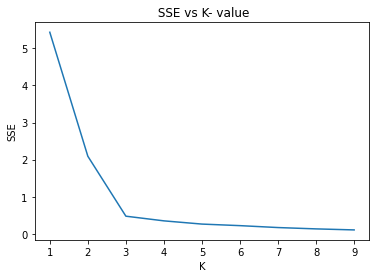

In [23]:
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title(' SSE vs K- value')